# Hypothesis Cases

### Case 1: Loaded dice
Hypothesis - Tommy is winning a lot over dice. Is the Dice Loaded, is he cheating?

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the Data

data = np.loadtxt('./data/5_HypothesisTesting/1_Loaded_Die/loaded_500.txt')

In [3]:
unique, counts = np.unique(data, return_counts= True)
print(unique, counts)

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


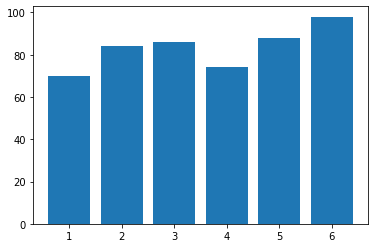

In [4]:
plt.bar(unique, counts);

In [5]:
# In Concept, if a die is weighted and gives 6 more often, then itll give 1 very less.

# Get the Occurance of 6
num_sixes = (data == 6).sum()
num_total = data.size

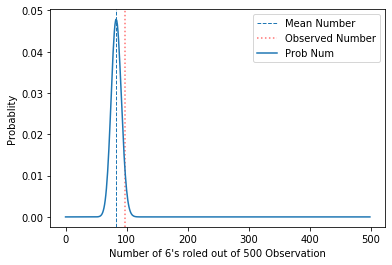

In [6]:
# We have 2 Outcome when you Roll a Dice., We roll 6 or we roll something else. As this is Discrete with 2 Options, we are
# looking for Binomial Distribution. With Fair Die, P(6) is 1/6

# What is the Chances that we Roll 98 or More with a Fair Die? 

from scipy.stats import binom

n = np.arange(num_total)

# Plot
prob_n = binom.pmf(n, num_total, 1/6)
plt.axvline(num_total/6, ls= "--", lw= 1, label= "Mean Number")
plt.axvline(num_sixes, ls= ":", color= "#ff7272", label= "Observed Number")
plt.plot(n, prob_n, label= "Prob Num")
plt.xlabel("Number of 6's roled out of {} Observation".format(num_total))
plt.ylabel("Probablity")
plt.legend();

In [7]:
# The Observed is Above the Average, but it is not ludicrous. So we need more Analysis

# The Probablity of getting More than 98+ chances can be obtained with Survival Function

Only 3.66% of the time with a fair dice, you will roll this many or more Sixes


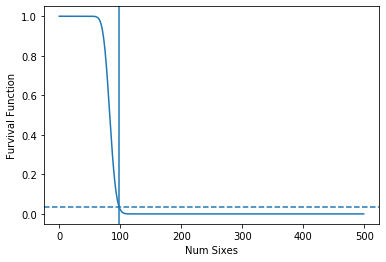

In [8]:
# Assign a Binomial Function as Base with 1/6 as a Probablity and use Survival Function

d = binom(num_total, 1/6)

# Apply the Function's Survival function to n
plt.plot(n, d.sf(n))
# Total No of Sixes line
plt.axvline(num_sixes, ls= "-") # Axis Vertical Line
sf = d.sf(num_sixes)
# Survival Function Line
plt.axhline(sf, ls= "--") # Axis Horizontal Line
plt.xlabel("Num Sixes")
plt.ylabel("Furvival Function")

print("Only {}% of the time with a fair dice, you will roll this many or more Sixes".format(round(sf * 100, 2)))

In [9]:
sf, 1-sf

(0.03657020131026334, 0.9634297986897367)

In [10]:
# If we have 5% P Value(95% Confidence), we can Say Tommy is a Liar with 96.34 Confidence

***

## Case 2: Asteroid Impact
What is the chance that within the Next thousand years, a high impact meteor will strike earth with a conveniance that the high impact meteor is greater than a kilometer in diameter

In [11]:
 # Importing the Data

df = pd.read_csv('data/5_HypothesisTesting/2_Meteorites/Meteorite_Landings.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass           45585 non-null float64
fall           45716 non-null object
year           45428 non-null float64
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [13]:
# Identify things we want to use

df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [14]:
# As Above, RecLat and RecLong are duplicates to GeoLocation., different sizes for Masses

# Drop values where mass and year have missing values

df2 = df.dropna(subset= ['mass', 'year'])

In [15]:
# Check if Mass is Non-Zero
df2 = df2[df2["mass"] > 0]

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45292 entries, 0 to 45715
Data columns (total 10 columns):
name           45292 non-null object
id             45292 non-null int64
nametype       45292 non-null object
recclass       45292 non-null object
mass           45292 non-null float64
fall           45292 non-null object
year           45292 non-null float64
reclat         38097 non-null float64
reclong        38097 non-null float64
GeoLocation    38097 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


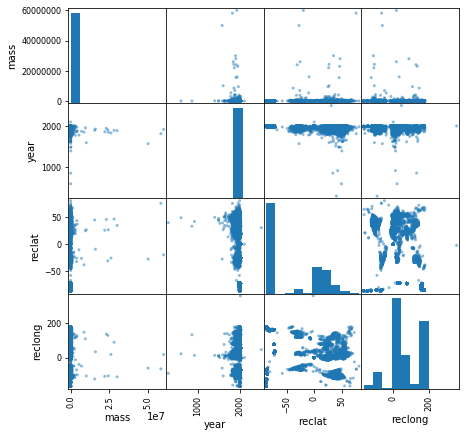

In [17]:
# Scatter Matrix

pd.plotting.scatter_matrix(df[['mass', 'year', 'reclat', 'reclong']], figsize= (7,7));

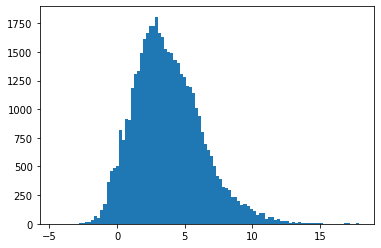

In [18]:
# No great analysis! So lets try others

year = df2["year"]
masses = df2["mass"]
# Our Mass values are heavily Skewed. So lets work on log for Masses
logmass = np.log(masses)

plt.hist(logmass, bins= 100);

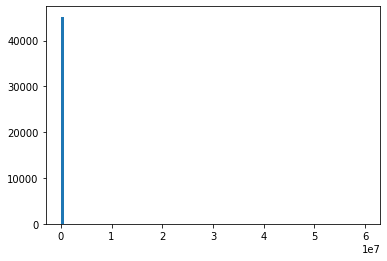

In [19]:
plt.hist(masses, bins= 100);

In [20]:
# Log Normal is a good way of Describing things that have +ve valued things

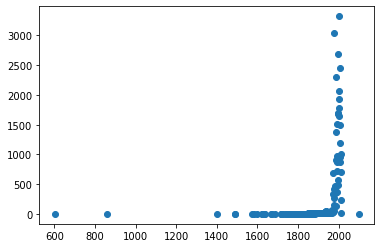

In [21]:
# Use Scatter plot to check year vs counts

counts = year.value_counts()

# Create Scatter plot with x and y as year and counts
plt.scatter(counts.index, counts.values)

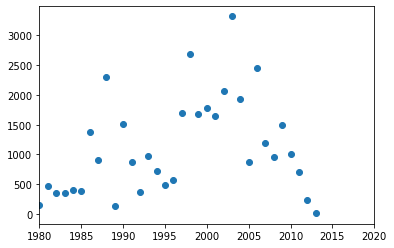

In [22]:
# Create Scatter plot with x and y as year and counts
plt.scatter(counts.index, counts.values)
plt.xlim(1980, 2020);

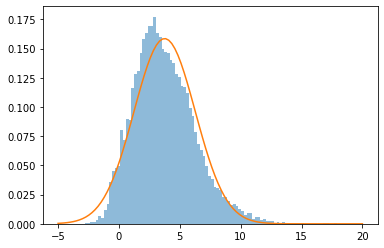

In [23]:
# Year and Mass are Independant. 

# Plot a PDF for this Distribution
from scipy.stats import norm, skewnorm, lognorm

ms = np.linspace(-5, 20, 100)

mean, std = logmass.mean(), np.std(logmass)
pdf_norm = norm.pdf(ms, mean, std)
plt.hist(logmass, bins=100, density= True, alpha= 0.5)
plt.plot(ms, pdf_norm);

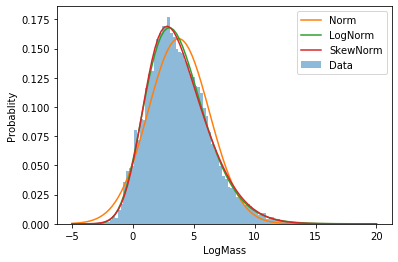

In [24]:
# Not Too Good and Not Too bad. Let us try for Lognorm and Skewnorm

# LoggNorm
p_lognorm = lognorm.fit(logmass)
pdf_lognorm = lognorm.pdf(ms, *p_lognorm)

# Skewnorm
p_skewnorm = skewnorm.fit(logmass)
pdf_skewnorm = skewnorm.pdf(ms, *p_skewnorm)

# Plots

plt.hist(logmass, bins=100, density= True, alpha= 0.5, label= "Data")
plt.plot(ms, pdf_norm, label= "Norm");
plt.plot(ms, pdf_lognorm, label= "LogNorm");
plt.plot(ms, pdf_skewnorm, label= "SkewNorm");
plt.legend();
plt.xlabel("LogMass")
plt.ylabel("Probablity");

In [25]:
# From the Visualisation, we can see that Log and Skew norm performs good 

# We need to convert that 1km Diameter into Mass

# Formula - Volume of Sphere. 1600 kg/m3 is density of Asteroid. 500*3 * 1000 - Convert 500 meters cube to Centimeters into grams
mass_of_doom = np.log((4/3) * np.pi * 500**3 * 1600 * 1000) # Just using Spherical Approximation

print(mass_of_doom)

34.36175044077777


Text(0.5, 1.0, 'Log Probablity of Asteroid being over given masses')

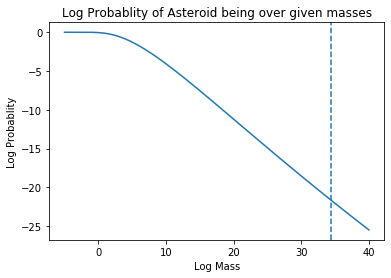

In [26]:
# we want to quantify chance that any meteroite is (34)this mass or more

ms2 = np.linspace(-5, 40, 200)

# Plot
plt.plot(ms2, lognorm.logsf(ms2, *p_lognorm)) # Survival Function;
plt.axvline(mass_of_doom, ls= "--")
plt.xlabel("Log Mass")
plt.ylabel("Log Probablity")
plt.title("Log Probablity of Asteroid being over given masses")

Text(0.5, 1.0, 'Log Probablity of Asteroid being over given masses')

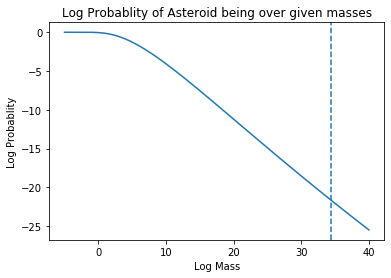

In [27]:
# we want to quantify chance that any meteroite is (34)this mass or more

ms2 = np.linspace(-5, 40, 200)

# Plot
plt.plot(ms2, lognorm.logsf(ms2, *p_lognorm)) # Survival Function;
plt.axvline(mass_of_doom, ls= "--")
plt.xlabel("Log Mass")
plt.ylabel("Log Probablity")
plt.title("Log Probablity of Asteroid being over given masses")

In [28]:
# With the Above plot, we can say that any asteroid has no chance that it is 35 kg/ Killer Asteroid

In [29]:
# Now We need Numbers, so we take time into Account
# We assume, we only catch 20-30% of the Events happening

prob_low_mass = lognorm.logcdf(mass_of_doom, *p_lognorm) # We Unrap all log norm parametrization
np.exp(prob_low_mass)

0.9999999995938732

In [30]:
# Model

frac_sky_monitored = 0.2 # 20%
num_years = 1000
num_events = num_years * counts.max() / frac_sky_monitored
print(num_events)

# Probablity of Bad Happening
prob_bad = 1 - np.exp(num_events * prob_low_mass)

print("Probablity that a > 1km asteroid impacts with {years} years is {oth}%".format(years=num_years, oth= round(prob_bad * 100, 2)))

16610000.0
Probablity that a > 1km asteroid impacts with 1000 years is 0.67%


****
## Case 3: Election Fraud

In [31]:
# Importing the Libraries

from scipy.stats import norm

In [32]:
# Hypothesis
# What is the Chance that Candidate A has got more votes than reported - One Tailed Test
# - Null Hypothesis - 39% votes gone to Candidate A and 61% gone to Candidate B
# - Alternate Hypothesis - > 39% votes gone to Candidate A and < 61% gone to Candidate B

# We have a Binary Response, So we can use Proportion Testing (Normal Approximation)
# Proportion testing is, if you the binomial as normal and run tests instead of binomial distribution

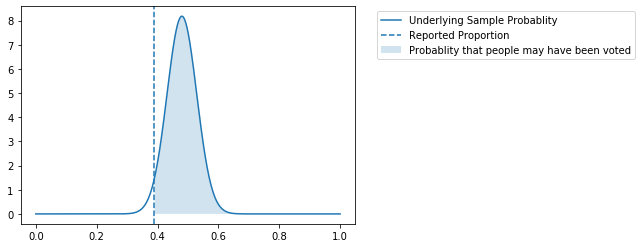

In [33]:
# Proportion Testing is a Normal Approximation where the width is defined as such. It is sqrt(True samples in candidate A * 
# candidate B) / (divided by Total N)

sigma = np.sqrt(0.39 * 0.61 / 100)

# Reported that 39% of the Voters are in favor of Candidate 1
reported = 0.39
# sample we got that 48% of the Voters are in favor of Candidate 1
sample = 0.48

xs = np.linspace(0,1,500)
ps = norm.pdf(xs, sample, sigma) # data=xs, mean= sample, width/sigma = sigma
plt.plot(xs, ps, label= "Underlying Sample Probablity")
plt.axvline(reported, ls="--", label= "Reported Proportion")
plt.fill_between(xs, ps, 0, alpha= 0.2, where= (xs > reported), label= "Probablity that people may have been voted")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [34]:
# To Get the Prob, we integerate PDF from the Line

print(reported, sample, sigma)
prob_more = norm.sf(reported, sample, sigma)

print("There is a {}% chance that Candidate A would have received More Votes".format(round(prob_more*100, 2)))

0.39 0.48 0.048774993593028795
There is a 96.75% chance that Candidate A would have received More Votes


In [35]:
# Check for Z Score

z_score = (sample-reported)/sigma
print(z_score)

z_score_needed_for_significance = norm.ppf(0.95) # What value give 95% in CDF., similar to confidence value

print("{} is larger than {}, So we are Significant".format(round(z_score, 2),round(z_score_needed_for_significance, 2)))
print("We have P-Value of {}".format(round(norm.sf(sample, reported, sigma),3)))

1.845207828235641
1.85 is larger than 1.64, So we are Significant
We have P-Value of 0.033


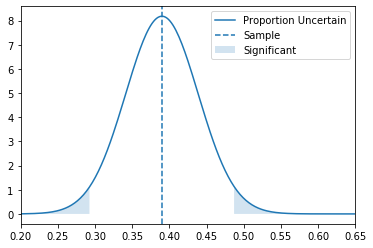

In [36]:
# What is the Chance that more than Candidate A got significantly different amount of votes than reported - Two Tailed Test
# Assumption P Value = 0.05 Significance

# Graphically Plot a Two tailed Test

xs = np.linspace(0,1, 500)
ps = norm.pdf(xs, reported, sigma)

# Plot
plt.plot(xs, ps, label= "Proportion Uncertain")
plt.axvline(reported, ls= "--", label= "Sample")
limits= norm.ppf([0.025, 0.975], reported, sigma)
plt.fill_between(xs, ps, 0, alpha= 0.2, where= (xs<limits[0])|(xs>limits[1]), label= "Significant")
plt.legend(loc=1)
plt.xlim(0.2, 0.65);

In [37]:
# Using Z Scores

z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.975) # What value give 95% in CDF., similar to confidence value
print("{} is less than {}, So we are'nt Significant".format(round(z_score, 2),round(z_score_needed_for_significance, 2)))

# Using P Values
p_value_two_tailed_test = 2* norm.sf(z_score)
print("The P value of {} is greater than 0.05".format(round(p_value_two_tailed_test, 2)))

1.85 is less than 1.96, So we are'nt Significant
The P value of 0.07 is greater than 0.05


****
## Comparing Distributions

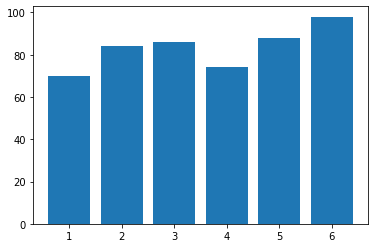

In [38]:
# Pearson's Chi-Square Tests

# Is the Distribution Roles Consistant with that of a fair dice
# Pearsons Chi Square is good for Comparing discrete distribution

data = np.loadtxt('./data/5_HypothesisTesting/4_Distributions/loaded_500.txt')
unique, counts = np.unique(data, return_counts= True)
plt.bar(unique, counts);

In [39]:
# Pearson's Chi Square Test

expected = data.size / 6 # For a Fair Dice
chi2_value = np.sum((counts - expected)**2 / expected)
print(chi2_value)

6.112


Our P Value is 0.295


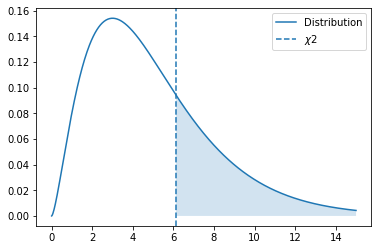

In [40]:
# Use Chi Square Value

from scipy.stats import chi2

chi2s = np.linspace(0,15,500)
prob = chi2.pdf(chi2s, 5) # 5 is 5 degrees of Freedom at chi2s values

# Plot
plt.plot(chi2s, prob, label= "Distribution")
plt.axvline(chi2_value, label= "$\chi2$", ls= "--")
plt.fill_between(chi2s, prob, 0, where= (chi2s > chi2_value), alpha= 0.2)
plt.legend();
print("Our P Value is {}".format(round(chi2.sf(chi2_value, 5), 3)))

In [41]:
# The Shaded one is the Probablity that represents our P Value 

# Another Method
from scipy.stats import chisquare
chisq, p = chisquare(counts, expected)
print("We have a Chi Square of {} with a P value of {}".format(round(chisq, 2), round(p, 3)))

We have a Chi Square of 6.11 with a P value of 0.295


In [42]:
# In this Test We dont have Significance, As we are looking at the Entire Distribution

***
## Non Parametric Tests

In [57]:
# Loaded Dice Distribution - Continuous Distribution
# Rolling 10e6 dice, is a continuous, not a discrete distribution

rolls_obs = np.loadtxt('./data/5_HypothesisTesting/5_KS_and_AD/loaded_many_100.txt')

In [58]:
unique, count_obs = np.unique(rolls_obs, return_counts= True)
count_obs = count_obs/count_obs.sum() # Normalize between 0 and 1, so it looks like a PDF

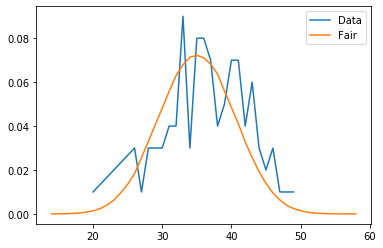

In [64]:
# Kolmogorow - Smirnow Test

# If Null hypothesis is True

# Create a Data fot test of Hypothesis
rolls_fair = np.random.randint(low=1, high=7, size= (500000, 10)).sum(axis=1)
unique2, count_fair = np.unique(rolls_fair, return_counts= True)
count_fair = count_fair/count_fair.sum() # Normalize between 0 and 1, so it looks like a PDF

# Plot
plt.plot(unique, count_obs, label= "Data")
plt.plot(unique2, count_fair, label= "Fair")
plt.legend();

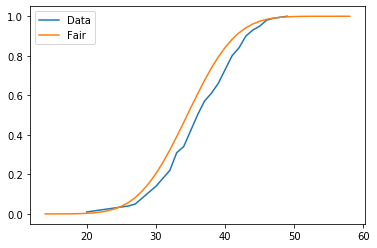

In [65]:
# Real data doesnt look good as we have only 100 data points

# For Less Noisy than PDF, try for CDF

cdf_obs = count_obs.cumsum()
cdf_fair = count_fair.cumsum()
plt.plot(unique, cdf_obs, label= "Data")
plt.plot(unique2, cdf_fair, label= "Fair")
plt.legend();

In [66]:
# Invoke KS Test

from scipy.stats import ks_2samp
statistic, pvalue = ks_2samp(rolls_obs, rolls_fair) # ks_2samp takes in 2 sets of Observation
print("KS Test Statistic of {}, P-value of {}".format(round(statistic, 3), round(pvalue, 3)))

KS Test Statistic of 0.134, P-value of 0.051


In [69]:
# KS creates a CDF like plot above, and check the difference between the Predicted and Actual Point (Like OLS), and takes
# the biggest line (Max. Difference), and what is the prob of getting that distance(P-Value)

# KS Tests have some issues when comparing distribution around tails. Its improvement is Anderson Darling Test

# Anderson Darling Test

from scipy.stats import anderson_ksamp

statistic, critical_values, sig_level = anderson_ksamp([rolls_obs, rolls_fair])

print("AD Test Statistic of {}, significance level of {}".format(round(statistic,5), round(sig_level, 9)))
print("Test Critical Values are {}".format(critical_values))
print("Sig Level Analogus to P Value, and Critical value are [25%, 10%, 5%, 2.5%, 1%]")

AD Test Statistic of 5.18433, significance level of 0.002980591
Test Critical Values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Sig Level Analogus to P Value, and Critical value are [25%, 10%, 5%, 2.5%, 1%]


In [ ]:
# Anderson Darling Test is the Best bet in figuring out if One distribution comes from another 